# Assignments 35 & 36

## RK( 4 ) with Adaptive Time Steps


                  RK(4) - Adaptive Time Steps


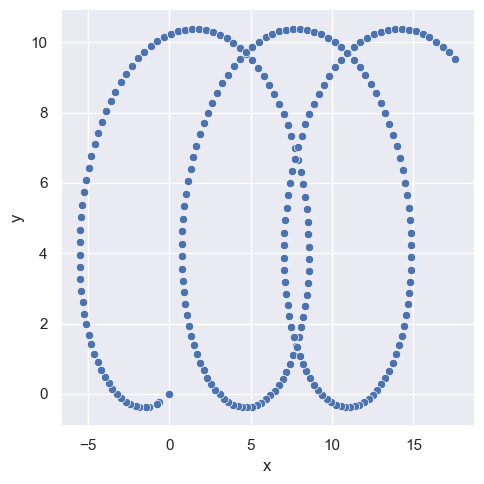

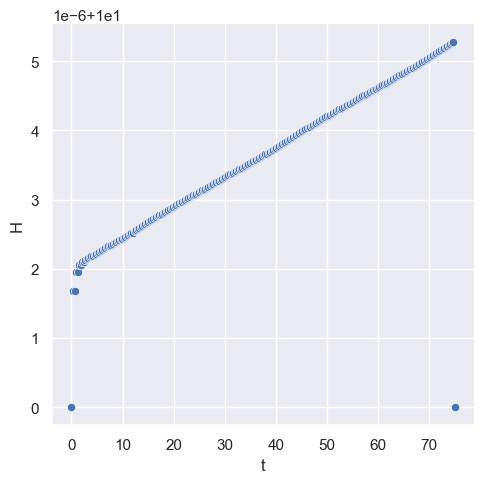

                  RK(4) - Adaptive Time Steps


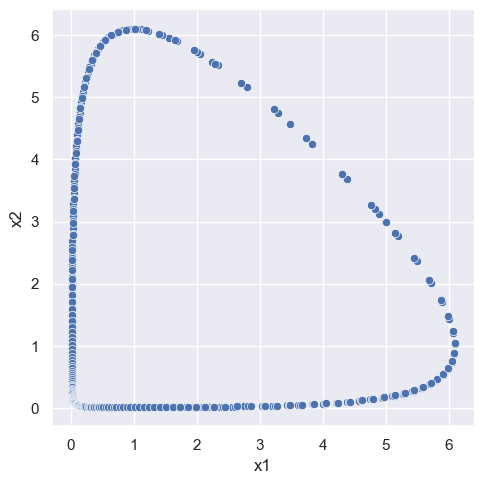


  d(x_{1}) - g*\ln(x1) + b*x_{2} - a*\ln(x_{2}) : RK(4) - ATS


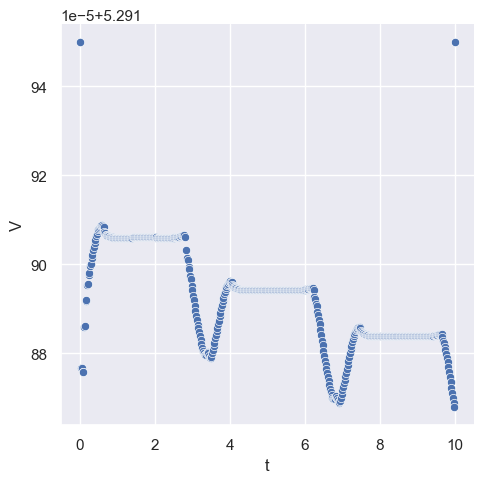

In [1]:
# jupyter nbconvert --to webpdf assignment33.ipynb
from copy import deepcopy
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
from tabulate import tabulate


def k(h: float, f: float) -> float:
    return h * f


def runge_kutta(k1: float, k2: float, k3: float, k4: float) -> float:
    return (1.0 / 6.0) * (k1 + 2.0 * k2 + 2.0 * k3 + k4)


def delta_x(x1: list, x3: list) -> list:
    return np.array(x3) - np.array(x1)


def delta(h: float, dx: list) -> float:
    return max(np.abs(dx)) / h


def epsilon_prime(F: list, X: list, epsilon: float) -> float:
    return epsilon * max(np.abs([F[i](X) for i in range(len(X))]))


def h_next(epsilon: float, delta: float) -> float:
    return (epsilon / delta) ** (1.0 / 5.0)


def step(t: int, h: float, X0: list, X: list, F: list, k: object) -> list:
    x = np.array(X[t - 1])
    k1 = np.array([k(h, F[i](x)) for i in range(x.size)])
    k2 = np.array([k(h, F[i](x + 0.5 * k1)) for i in range(len(X0))])
    k3 = np.array([k(h, F[i](x + 0.5 * k2)) for i in range(len(X0))])
    k4 = np.array([k(h, F[i](x + k3)) for i in range(len(X0))])

    return k1, k2, k3, k4


def solve_runge_kutta_ats(
    ti: float, tf: float, intrvls: int, X0: list, F: list
) -> list:
    """
    ti: initial time
    tf: final time
    intrvls: number of intervals into which tf - ti is divided
    X0: inital X values
    F: components of f(t, x)
    """
    h = (tf - ti) / intrvls
    X = [deepcopy(X0) for i in range(intrvls)]
    for t in range(1, intrvls - 1):
        X1 = deepcopy(X)
        X2 = deepcopy(X)
        k1, k2, k3, k4 = step(t, h, X0, X1, F, k)
        for i in range(len(X0)):  # take one step of size h
            X1[t][i] = X1[t - 1][i] + runge_kutta(k1[i], k2[i], k3[i], k4[i])
        for j in range(2):  # take two steps of size h / 2
            k1_, k2_, k3_, k4_ = step(t + j, h / 2.0, X0, X2, F, k)
            for i in range(len(X0)):
                X2[t + j][i] = X2[t + j - 1][i] + runge_kutta(
                    k1_[i], k2_[i], k3_[i], k4_[i]
                )
        DX = delta_x(X1[t], X2[t + 1])
        # print(DX)
        Delta = delta(h, DX)
        # print(Delta)
        EPR = epsilon_prime(F, X2[t + 1], 0.0000000001)
        # print(EPR, Delta)
        h = h_next(EPR, Delta)
        # print(h)
        X[t] = deepcopy(X2[t]) + np.array(DX) / 15.0
        del X1
        del X2

    return X


##################################################
###### Charged Particle in Crossed EM Field ######
##################################################
f1 = lambda x: x[2]
f2 = lambda x: x[3]
g1 = lambda x: x[3]
g2 = lambda x: 1 - x[2]

h = lambda x: (0.5 * (x[2] ** 2 + x[3] ** 2)) - x[1]

F = [f1, f2, g1, g2]

table1 = solve_runge_kutta_ats(0, 75, 250, [0, 0, -4, -2], F)
xy_rk = [table1[i][0:2] for i in range(len(table1))]
print("\n                  RK(4) - Adaptive Time Steps")
fig1 = sns.relplot(data=pd.DataFrame(xy_rk, columns=["x", "y"]), x="x", y="y")
plt.show()
plt.close()

H = [h(x) for x in table1]
Ht = list(zip(np.linspace(0, 75, 250), H))

fig1_1 = sns.relplot(data=pd.DataFrame(Ht, columns=["t", "H"]), x="t", y="H")
plt.show()
plt.close()

#######################################
###### Predator - Prey Equations ######
#######################################
v = lambda x: x[0] - np.log(x[0]) + x[1] - np.log(x[1])

f1 = lambda x: x[0] * (1 - x[1])
f2 = lambda x: x[1] * (x[0] - 1)

F = [f1, f2]

table3 = solve_runge_kutta_ats(0, 10, 500, [5, 3], F)
xy_rk = [(table3[i][0], table3[i][1]) for i in range(len(table3))]
print("                  RK(4) - Adaptive Time Steps")
fig3 = sns.relplot(data=pd.DataFrame(xy_rk, columns=["x1", "x2"]), x="x1", y="x2")
plt.show()
plt.close()

V = [v(x) for x in table3]
Vt = list(zip(np.linspace(0, 10, 500), V))

print("\n  d(x_{1}) - g*\ln(x1) + b*x_{2} - a*\ln(x_{2}) : RK(4) - ATS")
fig3_1 = sns.relplot(data=pd.DataFrame(Vt, columns=["t", "V"]), x="t", y="V")
plt.show()
plt.close()